# Data Mining Homework 3
## Question 10
### Mohammad Bahrami - 9724133

In [1]:
import numpy as np
import pandas as pd

### Part a
Data Preparation

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Nan Count
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Handling Missing Data
dataset.fillna(
    {
        'Age': dataset['Age'].median(),
        'Embarked': dataset['Embarked'].mode()
    },
    inplace=True
)
dataset.dropna(subset=['Cabin'], inplace=True)
dataset.reset_index(drop=True, inplace=True)


# Creating the Familysize
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


#Replacing Age
dataset['Age'] = np.select(
    [
        dataset['Age'] < 10,
        (dataset['Age'] >= 10) & (dataset['Sex'] == 'female'),
        (dataset['Age'] >= 10) & (dataset['Sex'] == 'male')
    ],
    ['child', 'female', 'male']
)

#Droping Unused Columns
dataset.drop(['Parch', 'SibSp', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
dataset.shape


#OneHot Encoding the Categorical Variables
from sklearn.preprocessing import OneHotEncoder

non_numeric_columns = ~np.isin(dataset.columns, dataset.select_dtypes(np.number).columns)

dataset.loc[:, non_numeric_columns] = dataset.loc[:, non_numeric_columns].apply(
    lambda z: pd.Series(
        OneHotEncoder(sparse=False).fit_transform(z.to_numpy().reshape((-1, 1))).tolist(),
        index=z.index
        ),
    axis=0)
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,1,1,"[1.0, 0.0]","[0.0, 1.0, 0.0]",71.2833,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]",2
1,1,1,"[1.0, 0.0]","[0.0, 1.0, 0.0]",53.1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]",2
2,0,1,"[0.0, 1.0]","[0.0, 0.0, 1.0]",51.8625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]",1
3,1,3,"[1.0, 0.0]","[1.0, 0.0, 0.0]",16.7000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]",3
4,1,1,"[1.0, 0.0]","[0.0, 1.0, 0.0]",26.5500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]",1
...,...,...,...,...,...,...,...,...
199,1,1,"[1.0, 0.0]","[0.0, 1.0, 0.0]",52.5542,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]",3
200,0,1,"[0.0, 1.0]","[0.0, 0.0, 1.0]",5.0000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]",1
201,1,1,"[1.0, 0.0]","[0.0, 1.0, 0.0]",83.1583,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0]",2
202,1,1,"[1.0, 0.0]","[0.0, 1.0, 0.0]",30.0000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]",1


Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
train_indcs, test_indcs = train_test_split(np.arange(dataset.shape[0]), test_size=0.3)
train_df = dataset.loc[train_indcs, :]
test_df = dataset.loc[test_indcs, :]

X_train = np.concatenate((
    train_df.loc[:, (~non_numeric_columns) & (train_df.columns != 'Survived')],
    np.stack(train_df.loc[:, non_numeric_columns].apply(np.concatenate, axis=1))
), axis=1)
Y_train = train_df['Survived'].to_numpy()

X_test = np.concatenate((
    test_df.loc[:, (~non_numeric_columns) & (test_df.columns != 'Survived')],
    np.stack(test_df.loc[:, non_numeric_columns].apply(np.concatenate, axis=1))
), axis=1)
Y_test = test_df['Survived'].to_numpy()

### Part b

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1)
).fit(X_train, Y_train)

AdaBoost Accuracy:  72.58


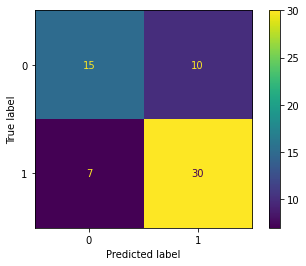

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(f'AdaBoost Accuracy: {ada.score(X_test, Y_test)*100: .2f}')
cm = confusion_matrix(Y_test, ada.predict(X_test))
ConfusionMatrixDisplay(cm).plot()